In [1]:
import pandas as pd

In [13]:
train = pd.read_csv("./bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("./bike/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("./bike/sampleSubmission.csv")

In [3]:
print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [5]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

In [6]:
print(train['count'].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


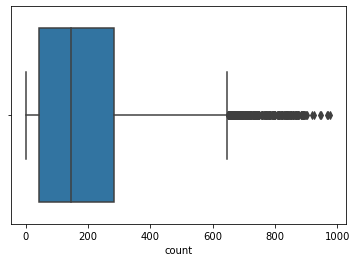

In [7]:
sns.boxplot(train['count'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

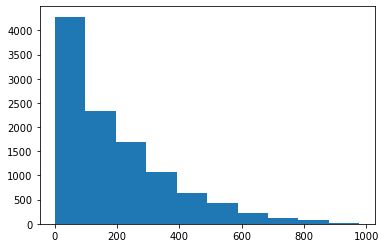

In [8]:
plt.hist(train['count'])

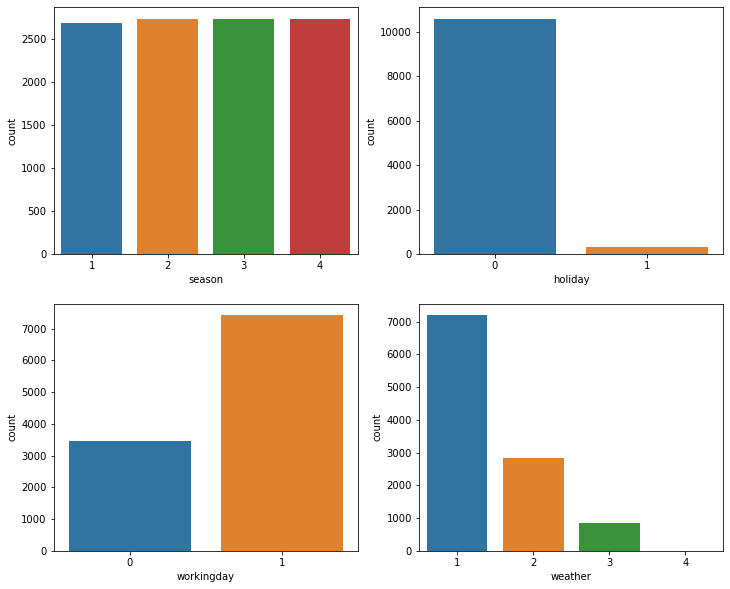

In [9]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()  # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다. 

In [10]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

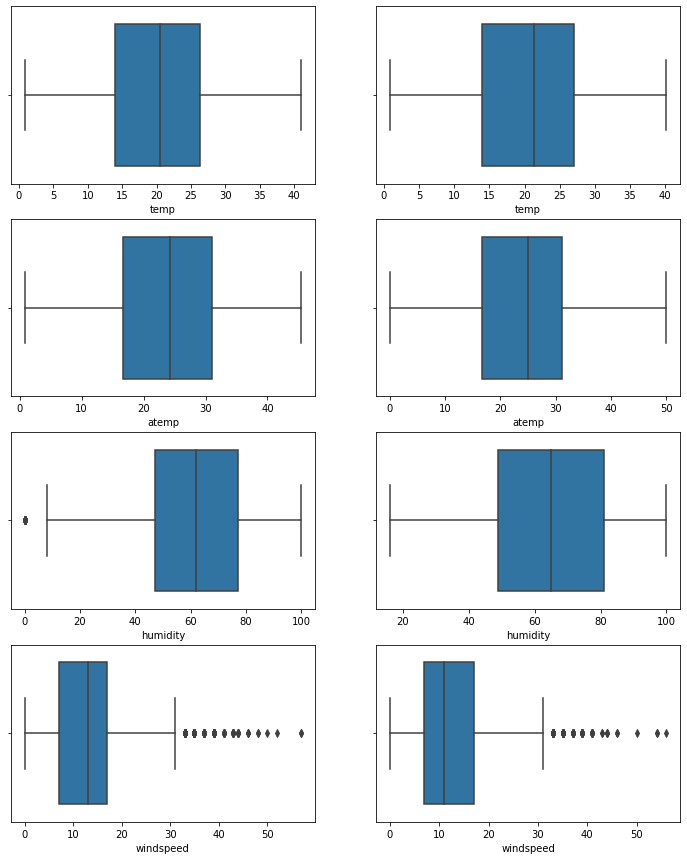

In [11]:
i = 0
plt.figure(figsize=(12,15))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show() 


In [12]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [15]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [16]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

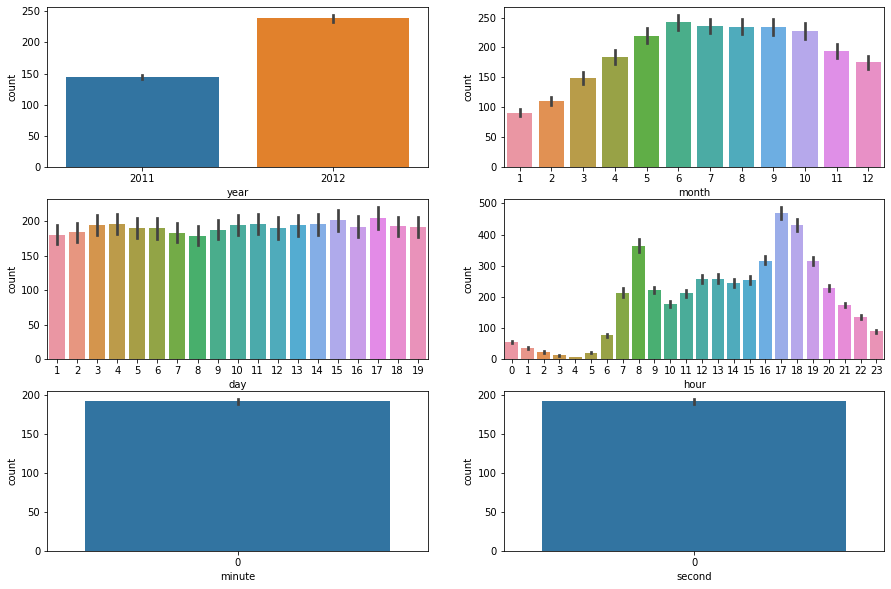

In [17]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

* 2011년보다 2012년이 빌린 대수가 전체적으로 많다.
* 여름철에 빌린 대수가 많고, 6월에 가장 많다.
* 8시, 17시에 빌린대수가 많다. 출퇴근시간
* day는 어떤 것을 확인할 수 있을까요? 1일부터 19일까지
* day는 테스트데이터는 20일부터..
* minute, second는 어떻게 될까요? 의미없다.

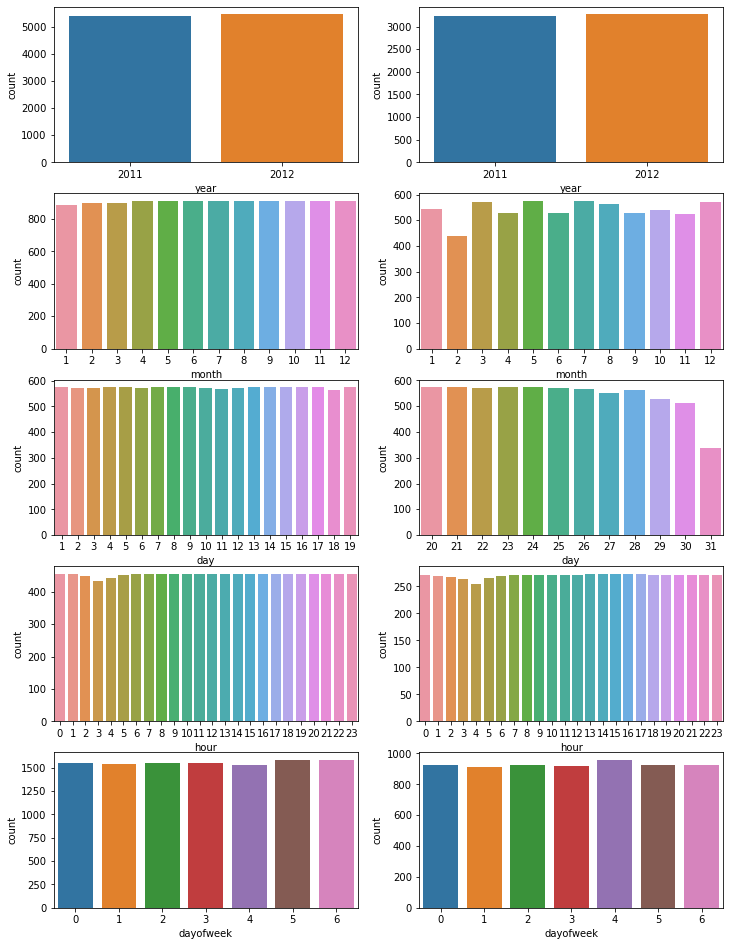

In [18]:
col_names = ['year','month','day','hour','dayofweek']
i = 0

plt.figure(figsize=(12,20))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_tr)
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_test)
  
plt.show()

In [19]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek  # Monday=0, Sunday=6

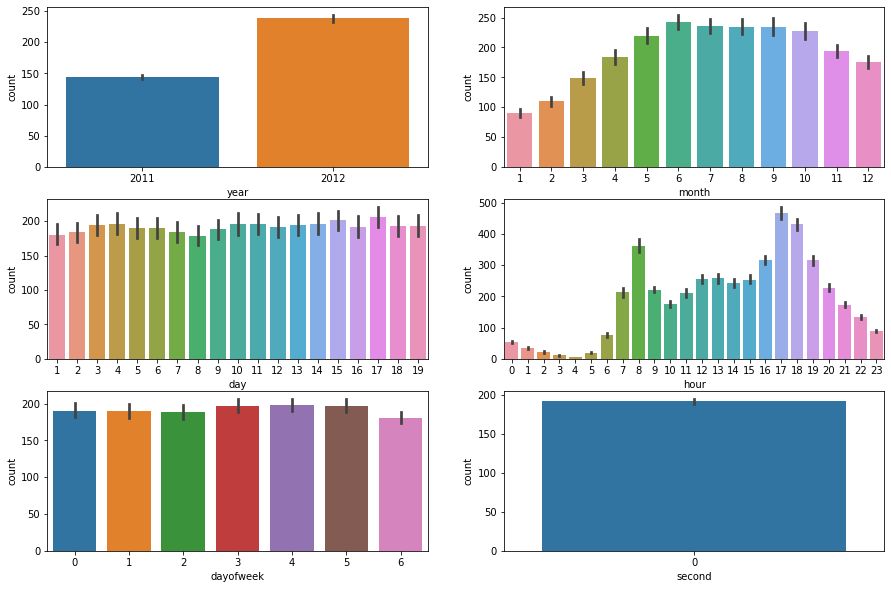

In [20]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

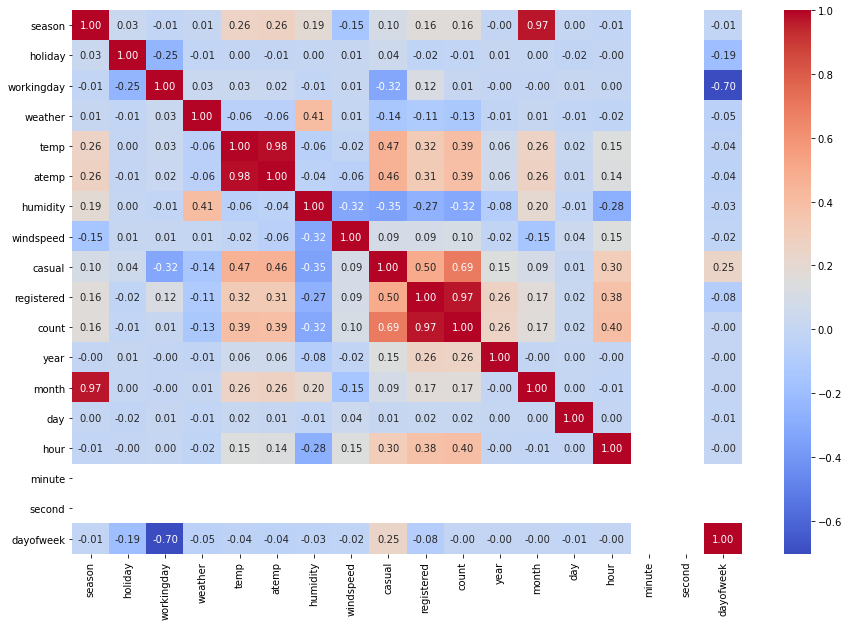

In [21]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

### 4개변수 코드로 만든다.

In [22]:
feature_names = [ 'temp', 'atemp', 'humidity', "hour"]  # 공통 변수

X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_train.head())

label_name = 'count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택

   temp   atemp  humidity  hour
0  9.84  14.395        81     0
1  9.02  13.635        80     1
2  9.02  13.635        80     2
3  9.84  14.395        75     3
4  9.84  14.395        75     4


In [23]:
from sklearn.linear_model import LinearRegression   # 선형회귀

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)

sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions



In [24]:
sub.loc[ sub['count'] < 0, 'count' ] = 0
sub.loc[ sub['count'] < 0, : ]

,datetime,count


In [25]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("fourthSub.csv", index=False)

### score : 1.21617

In [26]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model

RandomForestRegressor(n_jobs=-1, random_state=37)

In [27]:
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([ 24.425     ,  19.99166667,  20.96316667, ...,  77.08833333,
       103.96833333,  47.22483333])

In [28]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions

In [29]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("fiveSub.csv", index=False)

In [ ]:
### 0.749 
### 0.574

### 특징(feature)을 여러개 추가시키기

### 0.574 -> 0.419 향상

### 0.75501 -> 0.41946

### 0.749  -> 